In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup as soup
from functools import reduce
import requests

In [3]:
dfexpectancy = pd.read_csv('C:/Users/user/data/API_SP.DYN.LE00.IN_DS2_en_csv_v2_4770434.csv')
dfpoverty = pd.read_csv('C:/Users/user/data/pip_dataset.csv')
pd.set_option('display.max_rows', 100)

In [4]:
dfpoverty.head(5)

,country,year,reporting_level,welfare_type,ppp_version,survey_year,survey_comparability,headcount_ratio_international_povline,headcount_ratio_lower_mid_income_povline,headcount_ratio_upper_mid_income_povline,...,decile8_thr,decile9_thr,gini,mld,polarization,palma_ratio,s80_s20_ratio,p90_p10_ratio,p90_p50_ratio,p50_p10_ratio
0,Albania,1996,national,consumption,2011,1996.0,0.0,0.920669,11.174149,44.618417,...,8.85,10.92,0.270103,0.119104,0.241293,0.928335,3.945872,3.568627,1.889273,1.888889
1,Albania,2002,national,consumption,2011,2002.0,1.0,1.570843,14.132118,49.669635,...,8.83,11.58,0.317390,0.164812,0.268982,1.215056,4.831625,3.979381,2.090253,1.903780
2,Albania,2005,national,consumption,2011,2005.0,1.0,0.860527,8.715685,38.545254,...,10.02,12.78,0.305957,0.154413,0.254529,1.142718,4.662236,3.872727,1.978328,1.957576
3,Albania,2008,national,consumption,2011,2008.0,1.0,0.313650,5.250542,31.110345,...,10.74,13.62,0.299847,0.148893,0.247311,1.114657,4.395911,3.574803,1.956897,1.826772
4,Albania,2012,national,consumption,2011,2012.0,1.0,0.849754,6.182414,34.528906,...,10.52,13.26,0.289605,0.138417,0.249988,1.041193,4.272573,3.632877,1.941435,1.871233


In [5]:
dfexpectancy.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,64.152000,64.537000,64.752000,65.132000,65.294000,65.502000,...,75.531000,75.636000,75.601000,75.683000,75.617000,75.903000,76.072000,76.248000,75.723000,NaN
1,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,44.085552,44.386697,44.752182,44.913159,45.479043,45.498338,...,60.050780,60.709863,61.337911,61.856452,62.444045,62.922385,63.365858,63.755674,63.313856,NaN
2,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.535000,33.068000,33.547000,34.016000,34.494000,34.953000,...,61.923000,62.417000,62.545000,62.659000,63.136000,63.016000,63.081000,63.565000,62.575000,NaN
3,Africa Western and Central,AFW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.845152,38.164950,38.735102,39.063715,39.335360,39.618038,...,55.340561,55.673406,55.922229,56.195872,56.581678,56.888446,57.189139,57.555796,57.226373,NaN
4,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,38.211000,37.267000,37.539000,37.824000,38.131000,38.495000,...,58.623000,59.307000,60.040000,60.655000,61.092000,61.680000,62.144000,62.448000,62.261000,NaN


In [6]:
years = ['1960','1961','1962','1963','1964','1965','1966','1967','1968','1969','1970','1971','1972','1973','1974','1975','1976','1977','1978','1979','1980','1981','1982','1983','1984','1985','1986','1987','1988','1989','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
dfexpectancy = dfexpectancy.drop(['Indicator Name','Indicator Code'], axis= 1)
dfexpectancygrouped = dfexpectancy.melt(id_vars=['Country Name','Country Code'], value_vars= years, var_name='year', value_name='expectancy')
dfexpectancygrouped = dfexpectancygrouped.groupby(['Country Name','Country Code','year'],as_index= False, sort= False)['expectancy'].mean()
dfexpectancygrouped['year'] = dfexpectancygrouped['year'].astype('int')
dfexpectancygrouped

,Country Name,Country Code,year,expectancy
0,Aruba,ABW,1960,64.152000
1,Africa Eastern and Southern,AFE,1960,44.085552
2,Afghanistan,AFG,1960,32.535000
3,Africa Western and Central,AFW,1960,37.845152
4,Angola,AGO,1960,38.211000
...,...,...,...,...
16487,Kosovo,XKX,2021,NaN
16488,"Yemen, Rep.",YEM,2021,NaN
16489,South Africa,ZAF,2021,NaN
16490,Zambia,ZMB,2021,NaN


In [7]:
df2021 = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_life_expectancy', header = 1)[1]
df2021.dropna(inplace = True)
df2021['year'] = 2021
df2021.rename(columns = {'Countries and regions':'Country Name','All':'expectancy'},inplace = True)
df2021

,Country Name,expectancy,M,F,Gender life gap,year
0,Afghanistan,62.0,58.9,65.3,6.4,2021
1,Africa,61.7,59.7,63.7,4.0,2021
2,Albania,76.5,74.1,79.2,5.1,2021
3,Algeria,76.4,74.9,78.0,3.1,2021
4,American Samoa,72.5,69.1,76.6,7.5,2021
...,...,...,...,...,...,...
243,Western Sahara,70.8,69.1,72.9,3.8,2021
244,World,71.0,68.4,73.8,5.4,2021
245,Yemen,63.8,60.6,67.1,6.5,2021
246,Zambia,61.2,58.5,63.9,5.4,2021


In [8]:
df2020 = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_life_expectancy')[0]
df2020.dropna(inplace = True)
df2020['year'] = 2020
df2020.rename(columns = {'Countries':'Country Name', 'all':'expectancy'}, inplace = True)
df2020

,Country Name,expectancy,male,female,gendergap,Δ 2019all,Δ 2019male,Δ 2019female,Δ 2019gen. gap,year
1,Japan,84.62,81.64,87.74,6.10,0.26,0.23,0.29,0.06,2020
2,Singapore,83.74,81.50,86.10,4.60,0.15,0.10,0.20,0.10,2020
3,South Korea,83.43,80.50,86.50,6.00,0.20,0.20,0.20,0.00,2020
4,Norway,83.21,81.60,84.90,3.30,0.25,0.30,0.20,-0.10,2020
5,Australia,83.20,81.20,85.30,4.10,0.30,0.30,0.30,0.00,2020
...,...,...,...,...,...,...,...,...,...,...
191,Sierra Leone,55.07,54.21,55.88,1.66,0.37,0.36,0.38,0.02,2020
192,Nigeria,55.02,54.10,55.97,1.87,0.33,0.31,0.35,0.04,2020
193,Lesotho,54.84,51.70,58.09,6.38,0.50,0.50,0.51,0.01,2020
194,Chad,54.51,53.09,55.95,2.85,0.27,0.26,0.28,0.02,2020


In [9]:
data_frames = [dfexpectancygrouped,df2020,df2021]
dfexpectancygrouped = reduce(lambda  left,right: pd.merge(left,right,on=['Country Name','year','expectancy'],
                                            how='outer'), data_frames)
dfexpectancygrouped

,Country Name,Country Code,year,expectancy,male,female,gendergap,Δ 2019all,Δ 2019male,Δ 2019female,Δ 2019gen. gap,M,F,Gender life gap
0,Aruba,ABW,1960,64.152000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,1960,44.085552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1960,32.535000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,1960,37.845152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,1960,38.211000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16925,Western Sahara,NaN,2021,70.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.1,72.9,3.8
16926,World,NaN,2021,71.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.4,73.8,5.4
16927,Yemen,NaN,2021,63.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.6,67.1,6.5
16928,Zambia,NaN,2021,61.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.5,63.9,5.4


In [10]:
dfexpectancygrouped = dfexpectancygrouped.drop(['Gender life gap','F','M','male','female','gendergap','Δ 2019all','Δ 2019male','Δ 2019female','Δ 2019gen. gap'], axis = 1)
dfexpectancygrouped

,Country Name,Country Code,year,expectancy
0,Aruba,ABW,1960,64.152000
1,Africa Eastern and Southern,AFE,1960,44.085552
2,Afghanistan,AFG,1960,32.535000
3,Africa Western and Central,AFW,1960,37.845152
4,Angola,AGO,1960,38.211000
...,...,...,...,...
16925,Western Sahara,NaN,2021,70.800000
16926,World,NaN,2021,71.000000
16927,Yemen,NaN,2021,63.800000
16928,Zambia,NaN,2021,61.200000


In [11]:
dfcountries = dfexpectancygrouped.groupby('Country Name')['Country Code'].first()
dfcountries

Country Name
Afghanistan                     AFG
Africa                         None
Africa Eastern and Southern     AFE
Africa Western and Central      AFW
Albania                         ALB
                               ... 
World                           WLD
Yemen                          None
Yemen, Rep.                     YEM
Zambia                          ZMB
Zimbabwe                        ZWE
Name: Country Code, Length: 328, dtype: object

In [12]:
dfexpectancygrouped['Country Code'].fillna(dfexpectancygrouped['Country Name'].map(dfcountries), inplace = True)
dfexpectancygrouped.dropna(inplace = True)
dfexpectancygrouped

,Country Name,Country Code,year,expectancy
0,Aruba,ABW,1960,64.152000
1,Africa Eastern and Southern,AFE,1960,44.085552
2,Afghanistan,AFG,1960,32.535000
3,Africa Western and Central,AFW,1960,37.845152
4,Angola,AGO,1960,38.211000
...,...,...,...,...
16920,Vanuatu,VUT,2021,70.400000
16923,Vietnam,VNM,2021,73.600000
16926,World,WLD,2021,71.000000
16928,Zambia,ZMB,2021,61.200000


In [13]:
dfpoverty = dfpoverty.rename({'country':'Country Name'})
dfpoverty = dfpoverty.fillna(0)
dfpoverty['survey_year'] = dfpoverty['survey_year'].astype('int')
dfpoverty

,country,year,reporting_level,welfare_type,ppp_version,survey_year,survey_comparability,headcount_ratio_international_povline,headcount_ratio_lower_mid_income_povline,headcount_ratio_upper_mid_income_povline,...,decile8_thr,decile9_thr,gini,mld,polarization,palma_ratio,s80_s20_ratio,p90_p10_ratio,p90_p50_ratio,p50_p10_ratio
0,Albania,1996,national,consumption,2011,1996,0.0,0.920669,11.174149,44.618417,...,8.85,10.92,0.270103,0.119104,0.241293,0.928335,3.945872,3.568627,1.889273,1.888889
1,Albania,2002,national,consumption,2011,2002,1.0,1.570843,14.132118,49.669635,...,8.83,11.58,0.317390,0.164812,0.268982,1.215056,4.831625,3.979381,2.090253,1.903780
2,Albania,2005,national,consumption,2011,2005,1.0,0.860527,8.715685,38.545254,...,10.02,12.78,0.305957,0.154413,0.254529,1.142718,4.662236,3.872727,1.978328,1.957576
3,Albania,2008,national,consumption,2011,2008,1.0,0.313650,5.250542,31.110345,...,10.74,13.62,0.299847,0.148893,0.247311,1.114657,4.395911,3.574803,1.956897,1.826772
4,Albania,2012,national,consumption,2011,2012,1.0,0.849754,6.182414,34.528906,...,10.52,13.26,0.289605,0.138417,0.249988,1.041193,4.272573,3.632877,1.941435,1.871233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4872,Zambia,2010,national,consumption,2017,2010,4.0,68.456606,82.885088,93.044964,...,3.27,5.34,0.556215,0.539135,0.536149,4.278696,16.024650,10.470588,3.955556,2.647059
4873,Zambia,2015,national,consumption,2017,2015,4.0,61.352160,77.548045,90.747141,...,4.02,6.43,0.571361,0.604667,0.613181,4.995829,21.243915,13.978261,4.095541,3.413043
4874,Zimbabwe,2011,national,consumption,2017,2011,0.0,21.580063,47.857143,77.945113,...,7.25,10.54,0.431536,0.311153,0.388356,2.207938,8.526847,6.713376,2.773684,2.420382
4875,Zimbabwe,2017,national,consumption,2017,2017,0.0,34.206046,61.583570,84.109019,...,5.96,8.81,0.443371,0.322848,0.416694,2.307359,8.569542,6.574627,3.069686,2.141791


In [28]:
df = dfpoverty[['country','year','gini','mld','polarization','palma_ratio']].copy()
df.rename(columns = {'country':'Country Name'}, inplace = True)
df

,Country Name,year,gini,mld,polarization,palma_ratio
0,Albania,1996,0.270103,0.119104,0.241293,0.928335
1,Albania,2002,0.317390,0.164812,0.268982,1.215056
2,Albania,2005,0.305957,0.154413,0.254529,1.142718
3,Albania,2008,0.299847,0.148893,0.247311,1.114657
4,Albania,2012,0.289605,0.138417,0.249988,1.041193
...,...,...,...,...,...,...
4872,Zambia,2010,0.556215,0.539135,0.536149,4.278696
4873,Zambia,2015,0.571361,0.604667,0.613181,4.995829
4874,Zimbabwe,2011,0.431536,0.311153,0.388356,2.207938
4875,Zimbabwe,2017,0.443371,0.322848,0.416694,2.307359


In [32]:
df = pd.merge(df,dfexpectancygrouped, on = ['Country Name','year'])
df

,Country Name,year,gini,mld,polarization,palma_ratio,Country Code,expectancy
0,Albania,1996,0.270103,0.119104,0.241293,0.928335,ALB,74.592
1,Albania,1996,0.270103,0.119104,0.241293,0.928335,ALB,74.592
2,Albania,2002,0.317390,0.164812,0.268982,1.215056,ALB,75.890
3,Albania,2002,0.317390,0.164812,0.268982,1.215056,ALB,75.890
4,Albania,2005,0.305957,0.154413,0.254529,1.142718,ALB,76.621
...,...,...,...,...,...,...,...,...
4236,Zimbabwe,2011,0.431536,0.311153,0.388356,2.207938,ZWE,53.347
4237,Zimbabwe,2017,0.443371,0.322848,0.416694,2.307359,ZWE,60.709
4238,Zimbabwe,2017,0.443371,0.322848,0.416694,2.307359,ZWE,60.709
4239,Zimbabwe,2019,0.502565,0.427862,0.463899,0.000000,ZWE,61.292


<AxesSubplot:>

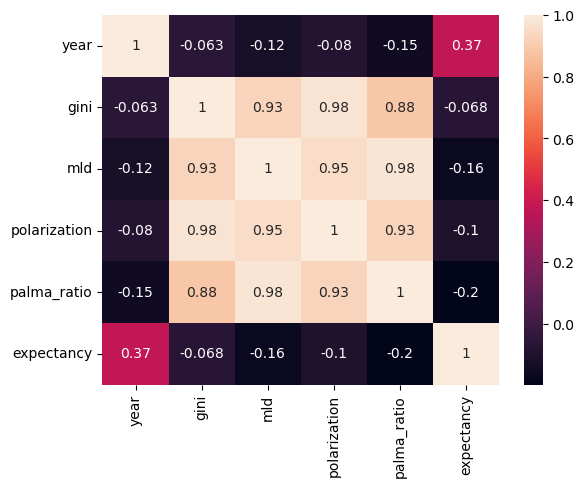

In [35]:
sns.heatmap(df.corr(), annot = True)

little to no correlation between life expectancy and poverty. there is a small correlation of life expectancy and year.